# GeoPotential

In [1]:
import sys
sys.path.append('../src/')
from modeling.utils.data import *
from modeling.utils.plotting import *
from modeling.utils.config import *
%load_ext autoreload
%autoreload 2

cpu


In [2]:
dt = build_data(normal_mode = 'flat')
dt = weighted_anomaly(dt)

Reading anomaly from file
	func:'read_nc' took: 0.8324 sec
	func:'build_data' took: 0.8623 sec
	func:'weighted_anomaly' took: 1226.4147 sec


In [3]:
dt = dt.sel(time = dt['time.month'].isin([6,7,8]))

In [11]:
pivot_anomaly = flat_table(dt)

	func:'flat_table' took: 1.4531 sec


In [4]:
#reduced_anomaly = reduce_dim(pivot_anomaly, method = 'PCA', exp_variance = 5, season = 'SUMMER', load_est = 'pca5_summer_geopotential.pkl')
reduced_anomaly = reduce_dim(dt, method = 'VAE', season = 'SUMMER', model = "sigma_vae_statedict_5_GEOP")

Processing batch 16Number of days: 3956, Density of the grid: 5 cells
	func:'reduce_dim' took: 613.8595 sec


In [9]:
for model in ['kmeans']:#,'bayesian_gmm','gmm']:
    for scoring in  ["score", "ch", "bic", "silhouette"]:
        estimator = cross_val(reduced_anomaly, method = model, scoring = scoring, season = "SUMMER", folder = 'GEOP_vae')

	Combination 1 score: -2089371110.400
	Combination 2 score: -2090680524.800
	Combination 3 score: -2090573798.400
	Combination 4 score: -2089371110.400
	Combination 5 score: -2090680524.800
	Combination 6 score: -2090573798.400
	Combination 7 score: -2089371187.200
	Combination 8 score: -2090680550.400
	Combination 9 score: -2090573772.800
	Combination 10 score: -2090009574.400
	Combination 11 score: -2090314931.200
	Combination 12 score: -2090351539.200
	Combination 13 score: -2090009574.400
	Combination 14 score: -2090314931.200
	Combination 15 score: -2090351616.000
	Combination 16 score: -2090009574.400
	Combination 17 score: -2090314905.600
	Combination 18 score: -2090351539.200
	Combination 19 score: -2089832038.400
	Combination 20 score: -2089743641.600
	Combination 21 score: nan
	Combination 22 score: -2089832089.600
	Combination 23 score: -2087388416.000
	Combination 24 score: -2089883852.800
	Combination 25 score: -2088814592.000
	Combination 26 score: -2089742643.200
	Combin

In [12]:
train_X, test_X, pivot_train, pivot_test = train_test_split(reduced_anomaly, pivot_anomaly, test_size = 0.2, random_state = 42)

### GeoPotential PCA

In [10]:
get_statistics(f'../models/{season}/GEOP_pca', train_X, test_X)

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



	func:'get_statistics' took: 122.0555 sec


Number of Clusters            BIC  \
bayesian_gmm_model_bic.pkl                          6 -154823.113941   
bayesian_gmm_model_ch.pkl                           6 -154823.113941   
bayesian_gmm_model_score.pkl                        5 -154780.069446   
bayesian_gmm_model_silhouette.pkl                   5 -154680.655655   
gmm_model_bic.pkl                                   4 -154615.752510   
gmm_model_ch.pkl                                    4 -154585.189712   
gmm_model_score.pkl                                 5 -154598.577988   
gmm_model_silhouette.pkl                            4 -154570.222016   
kmeans_model_bic.pkl                                6 -153867.341354   
kmeans_model_ch.pkl                                 4 -153976.911032   
kmeans_model_score.pkl                              7 -153894.666775   
kmeans_model_silhouette.pkl                         4 -153976.904712   

                                   Silhouette Score  Calinski Harabsz Index  \
bayesian_gmm_model_bic.pkl                -0.003189               32.203028   
bayesian_gmm_model_ch.pkl                 -0.003189               32.203028   
bayesian_gmm_model_score.pkl              -0.021284               24.421146   
bayesian_gmm_model_silhouette.pkl          0.004341               33.936700   
gmm_model_bic.pkl                          0.042782               50.909335   
gmm_model_ch.pkl                           0.042805               51.771699   
gmm_model_score.pkl                        0.023335               51.156746   
gmm_model_silhouette.pkl                   0.045763               52.589509   
kmeans_model_bic.pkl                       0.071785               61.986020   
kmeans_model_ch.pkl                        0.074321               77.659053   
kmeans_model_score.pkl                     0.067596               55.644227   
kmeans_model_silhouette.pkl                0.072987               77.575547   

                                        Inertia  
bayesian_gmm_model_bic.pkl         2.339042e+11  
bayesian_gmm_model_ch.pkl          2.339042e+11  
bayesian_gmm_model_score.pkl       2.495806e+11  
bayesian_gmm_model_silhouette.pkl  2.394503e+11  
gmm_model_bic.pkl                  2.353346e+11  
gmm_model_ch.pkl                   2.345822e+11  
gmm_model_score.pkl                2.342000e+11  
gmm_model_silhouette.pkl           2.341465e+11  
kmeans_model_bic.pkl               2.015535e+11  
kmeans_model_ch.pkl                2.164643e+11  
kmeans_model_score.pkl             1.974409e+11  
kmeans_model_silhouette.pkl        2.164670e+11

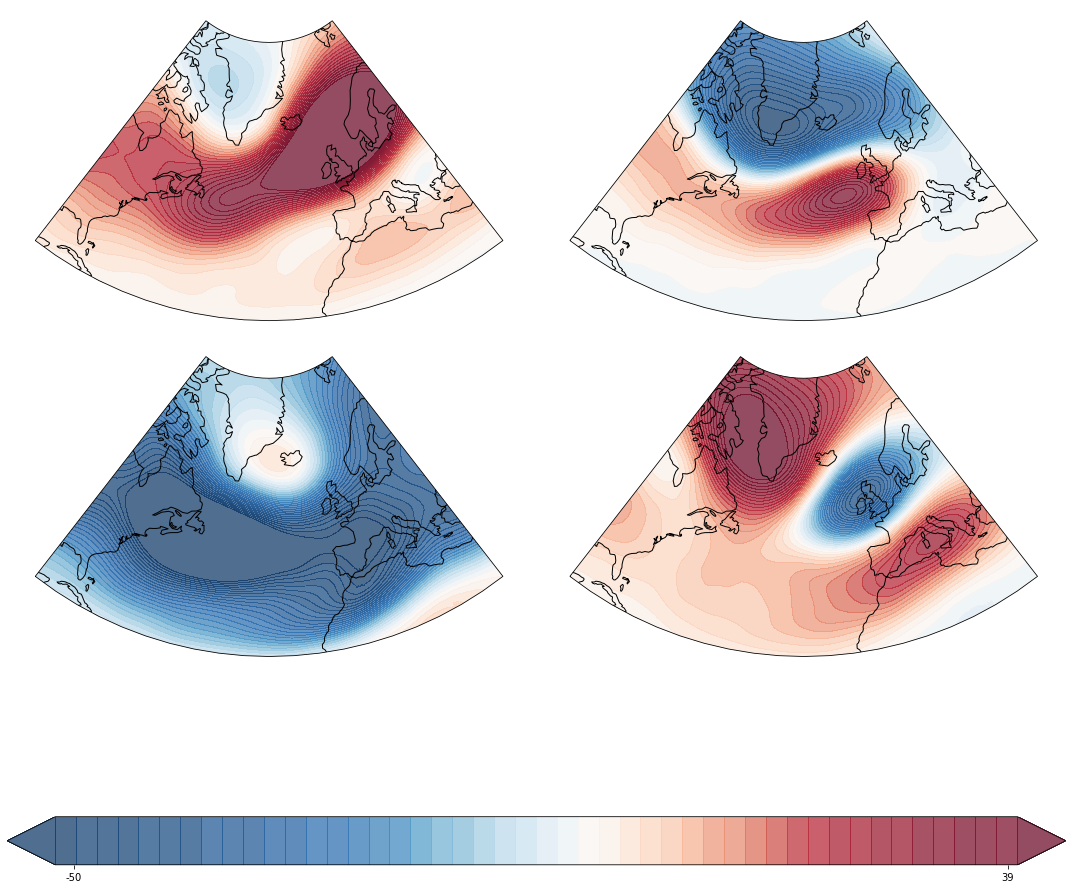

In [11]:
estimator = load_estimator(f'../models/{season}/GEOP_pca/kmeans_model_ch.pkl')
outputs = extract_regimes(reduced_anomaly, method='kmeans', nb_regimes = None, estimator = estimator)
labels, inertias, _ = outputs
#labels_text = {0: 'Zonal', 1: 'AL', 2: 'NAO-', 3: 'SB'}
#labels = list(map(lambda x: labels_text[x], labels))
plot_regimes(pivot_anomaly, labels)

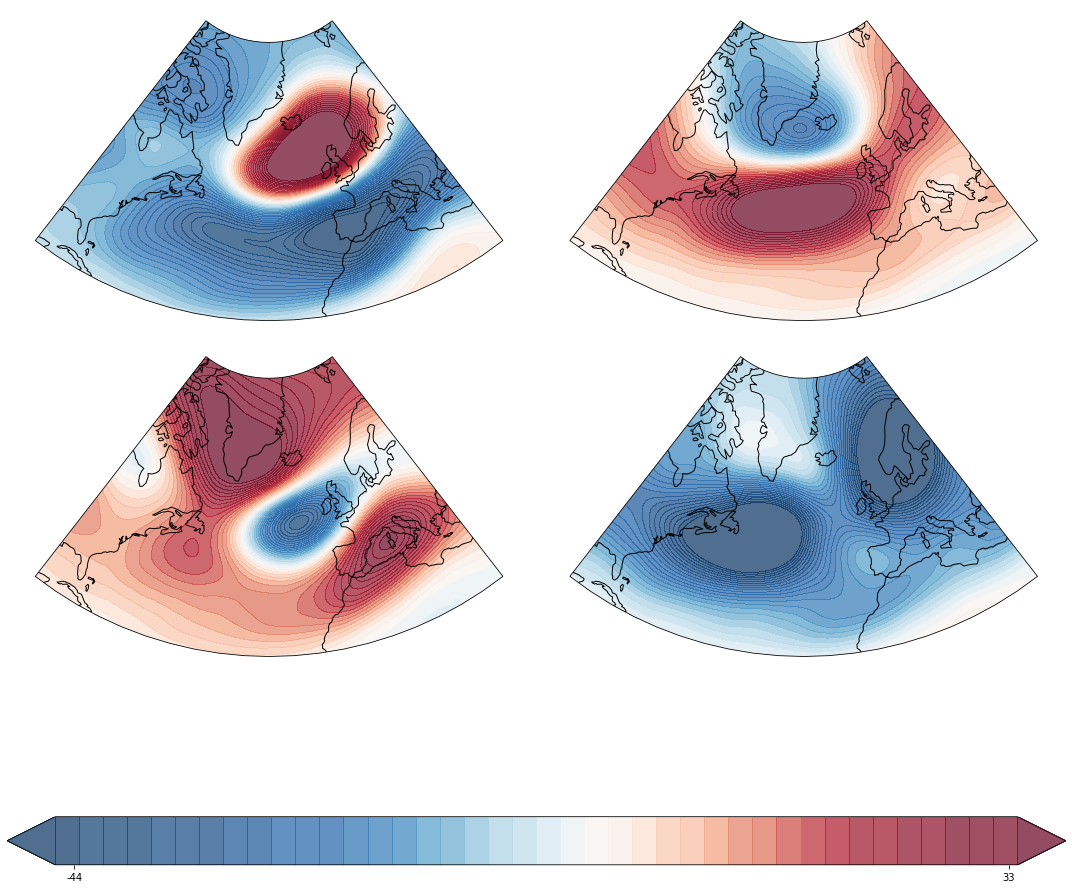

In [12]:
estimator = load_estimator(f'../models/{season}/GEOP_pca/gmm_model_silhouette.pkl')
probas, elbo, means, covariances, _ = extract_regimes(reduced_anomaly, method='gmm', nb_regimes = None, estimator = estimator)
labels = np.argmax(probas, axis=1)
#labels_text = {0: 'Zonal', 1: 'SB', 2: 'NAO-', 3: 'AL'}
#labels = list(map(lambda x: labels_text[x], labels))
plot_regimes(pivot_anomaly, labels)

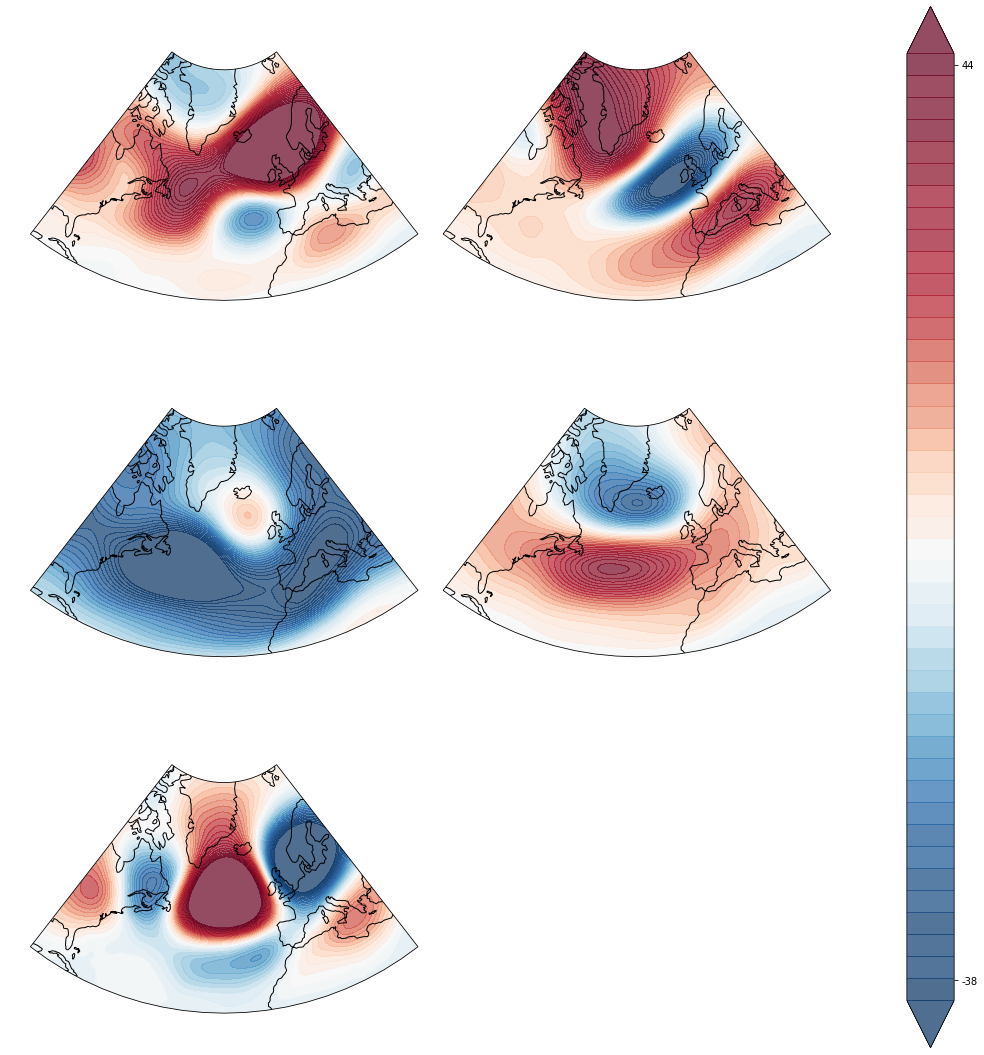

In [13]:
estimator = load_estimator(f'../models/{season}/GEOP_pca/bayesian_gmm_model_silhouette.pkl')
probas, elbo, means, covariances, _ = extract_regimes(reduced_anomaly, method='bayesian_gmm', nb_regimes = None, estimator = estimator)
labels = np.argmax(probas, axis=1)
#labels_text = {0: 'Zonal', 1: 'SB', 2: 'NAO-', 3: 'AL'}
#labels = list(map(lambda x: labels_text[x], labels))
plot_regimes(pivot_anomaly, labels)

### GeoPotential PCA 5 PCs

In [9]:
get_statistics(f'../models/{season}/GEOP_pca5', train_X, test_X)

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



	func:'get_statistics' took: 57.1613 sec


Number of Clusters           BIC  \
bayesian_gmm_model_bic.pkl                          4 -40766.135339   
bayesian_gmm_model_ch.pkl                           5 -40835.061729   
bayesian_gmm_model_score.pkl                        6 -40853.022363   
bayesian_gmm_model_silhouette.pkl                   5 -40817.186368   
gmm_model_bic.pkl                                   4 -40710.697129   
gmm_model_ch.pkl                                    4 -40744.040331   
gmm_model_score.pkl                                 6 -40741.742196   
gmm_model_silhouette.pkl                            4 -40716.494488   
kmeans_model_bic.pkl                                4 -40622.440646   
kmeans_model_ch.pkl                                 4 -40621.352608   
kmeans_model_score.pkl                              7 -40724.013715   
kmeans_model_silhouette.pkl                         6 -40674.223817   

                                   Silhouette Score  Calinski Harabsz Index  \
bayesian_gmm_model_bic.pkl                 0.116078              128.272237   
bayesian_gmm_model_ch.pkl                  0.110649              113.309333   
bayesian_gmm_model_score.pkl               0.090400              100.715299   
bayesian_gmm_model_silhouette.pkl          0.091182              105.398942   
gmm_model_bic.pkl                          0.127049              121.706831   
gmm_model_ch.pkl                           0.127097              125.881804   
gmm_model_score.pkl                        0.113497              121.048048   
gmm_model_silhouette.pkl                   0.127562              122.051196   
kmeans_model_bic.pkl                       0.149922              159.198584   
kmeans_model_ch.pkl                        0.149939              159.239913   
kmeans_model_score.pkl                     0.144393              126.214366   
kmeans_model_silhouette.pkl                0.151678              137.408690   

                                        Inertia  
bayesian_gmm_model_bic.pkl         1.126171e+11  
bayesian_gmm_model_ch.pkl          1.067640e+11  
bayesian_gmm_model_score.pkl       1.024766e+11  
bayesian_gmm_model_silhouette.pkl  1.095895e+11  
gmm_model_bic.pkl                  1.144310e+11  
gmm_model_ch.pkl                   1.151608e+11  
gmm_model_score.pkl                1.152781e+11  
gmm_model_silhouette.pkl           1.143566e+11  
kmeans_model_bic.pkl               1.042973e+11  
kmeans_model_ch.pkl                1.042358e+11  
kmeans_model_score.pkl             8.537869e+10  
kmeans_model_silhouette.pkl        8.946569e+10

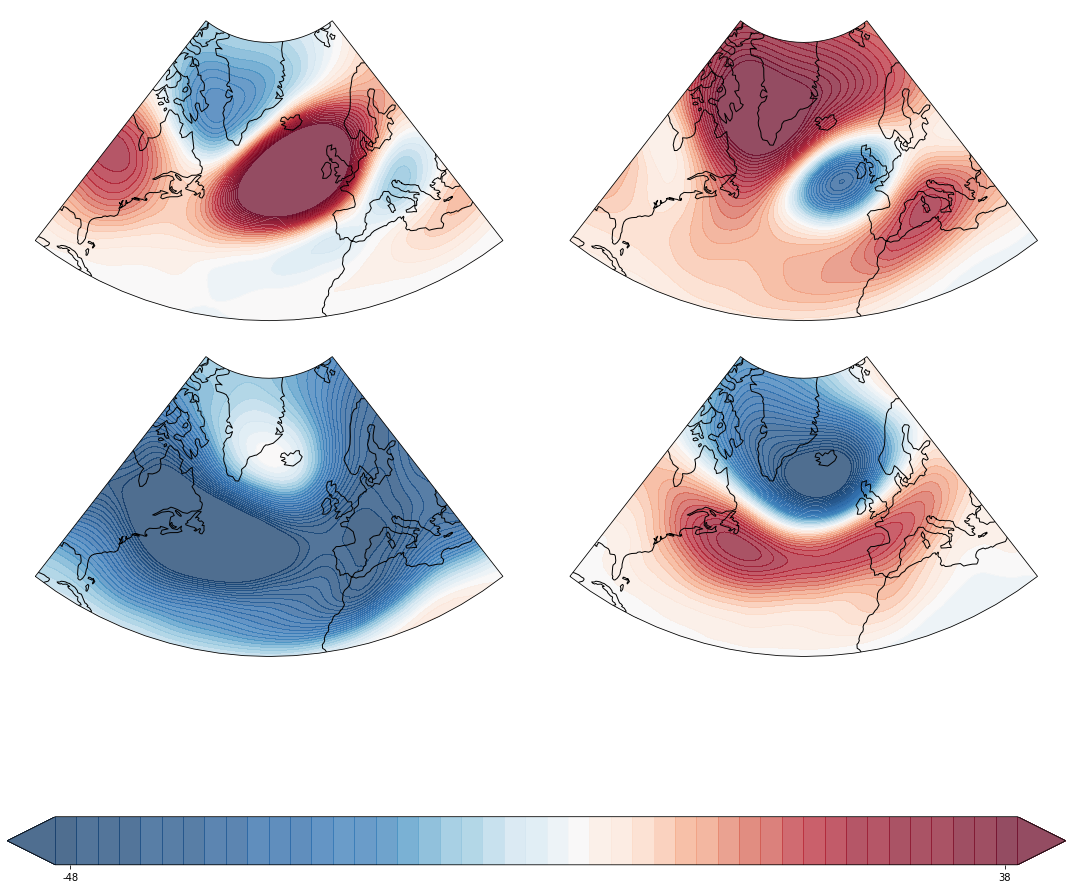

In [10]:
estimator = load_estimator(f'../models/{season}/GEOP_pca5/kmeans_model_ch.pkl')
outputs = extract_regimes(reduced_anomaly, method='kmeans', nb_regimes = None, estimator = estimator)
labels, inertias, _ = outputs
#labels_text = {0: 'Zonal', 1: 'AL', 2: 'NAO-', 3: 'SB'}
#labels = list(map(lambda x: labels_text[x], labels))
plot_regimes(pivot_anomaly, labels)

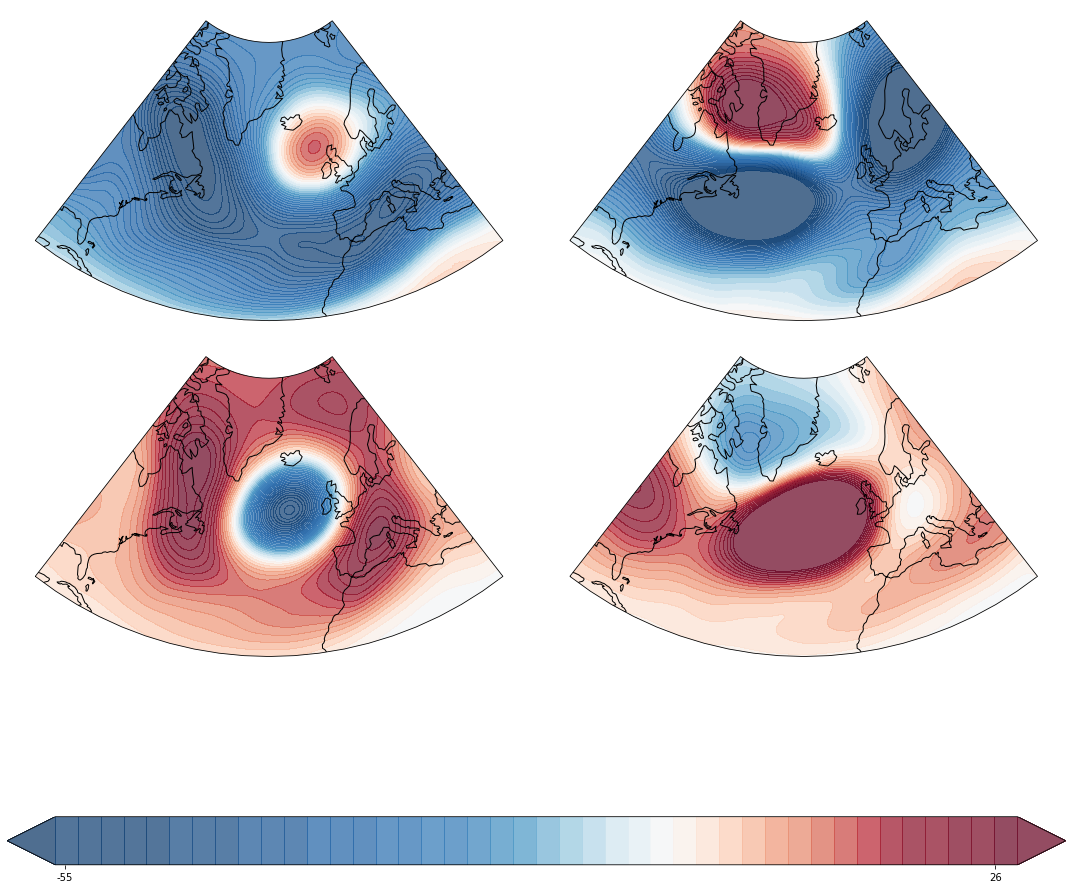

In [11]:
estimator = load_estimator(f'../models/{season}/GEOP_pca5/gmm_model_ch.pkl')
probas, elbo, means, covariances, _ = extract_regimes(reduced_anomaly, method='gmm', nb_regimes = None, estimator = estimator)
labels = np.argmax(probas, axis=1)
#labels_text = {0: 'Zonal', 1: 'SB', 2: 'NAO-', 3: 'AL'}
#labels = list(map(lambda x: labels_text[x], labels))
plot_regimes(pivot_anomaly, labels)

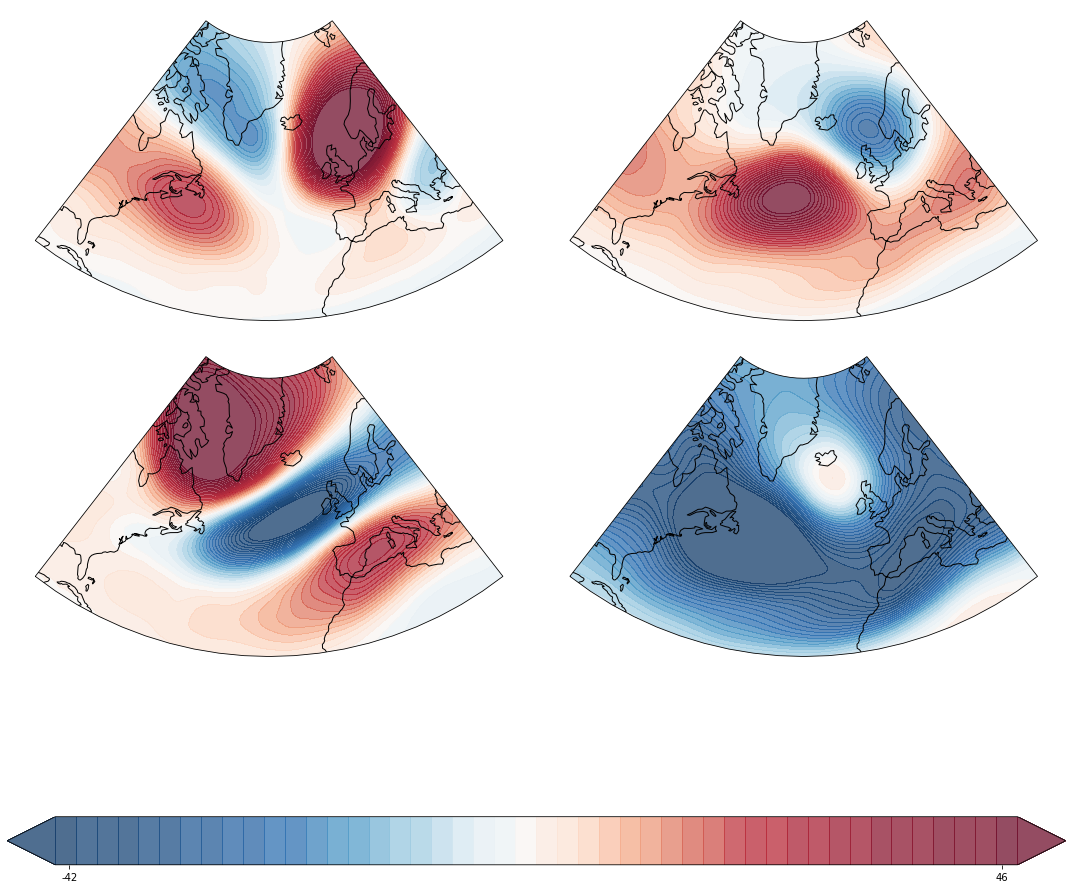

In [12]:
estimator = load_estimator(f'../models/{season}/GEOP_pca5/bayesian_gmm_model_bic.pkl')
probas, elbo, means, covariances, _ = extract_regimes(reduced_anomaly, method='bayesian_gmm', nb_regimes = None, estimator = estimator)
labels = np.argmax(probas, axis=1)
#labels_text = {0: 'Zonal', 1: 'SB', 2: 'NAO-', 3: 'AL'}
#labels = list(map(lambda x: labels_text[x], labels))
plot_regimes(pivot_anomaly, labels)

### Geopotential VAE

In [13]:
get_statistics(f'../models/{season}/GEOP_vae', train_X, test_X)

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



	func:'get_statistics' took: 222.7634 sec


Number of Clusters           BIC  \
bayesian_gmm_model_bic.pkl                          4 -33070.019840   
bayesian_gmm_model_ch.pkl                           7 -33307.668363   
bayesian_gmm_model_score.pkl                        7 -33259.053836   
bayesian_gmm_model_silhouette.pkl                   4 -33070.019840   
gmm_model_bic.pkl                                   4 -33079.005688   
gmm_model_ch.pkl                                    4 -33056.690289   
gmm_model_score.pkl                                 5 -33079.236443   
gmm_model_silhouette.pkl                            4 -33080.341652   
kmeans_model_bic.pkl                                4 -32739.543839   
kmeans_model_ch.pkl                                 4 -32743.384126   
kmeans_model_score.pkl                              7 -32773.773893   
kmeans_model_silhouette.pkl                         4 -32743.478660   

                                   Silhouette Score  Calinski Harabsz Index  \
bayesian_gmm_model_bic.pkl                 0.081014              126.380254   
bayesian_gmm_model_ch.pkl                  0.039011               81.879426   
bayesian_gmm_model_score.pkl               0.044888               84.795889   
bayesian_gmm_model_silhouette.pkl          0.081014              126.380254   
gmm_model_bic.pkl                          0.077362              124.599795   
gmm_model_ch.pkl                           0.099116              127.282596   
gmm_model_score.pkl                        0.077367              124.610139   
gmm_model_silhouette.pkl                   0.092122              122.969372   
kmeans_model_bic.pkl                       0.182577              186.837873   
kmeans_model_ch.pkl                        0.182715              187.348962   
kmeans_model_score.pkl                     0.169905              150.310643   
kmeans_model_silhouette.pkl                0.182862              187.282514   

                                        Inertia  
bayesian_gmm_model_bic.pkl         2.326872e+09  
bayesian_gmm_model_ch.pkl          2.146898e+09  
bayesian_gmm_model_score.pkl       2.110307e+09  
bayesian_gmm_model_silhouette.pkl  2.326872e+09  
gmm_model_bic.pkl                  2.339318e+09  
gmm_model_ch.pkl                   2.312012e+09  
gmm_model_score.pkl                2.339506e+09  
gmm_model_silhouette.pkl           2.345573e+09  
kmeans_model_bic.pkl               2.003734e+09  
kmeans_model_ch.pkl                2.002350e+09  
kmeans_model_score.pkl             1.608400e+09  
kmeans_model_silhouette.pkl        2.002875e+09

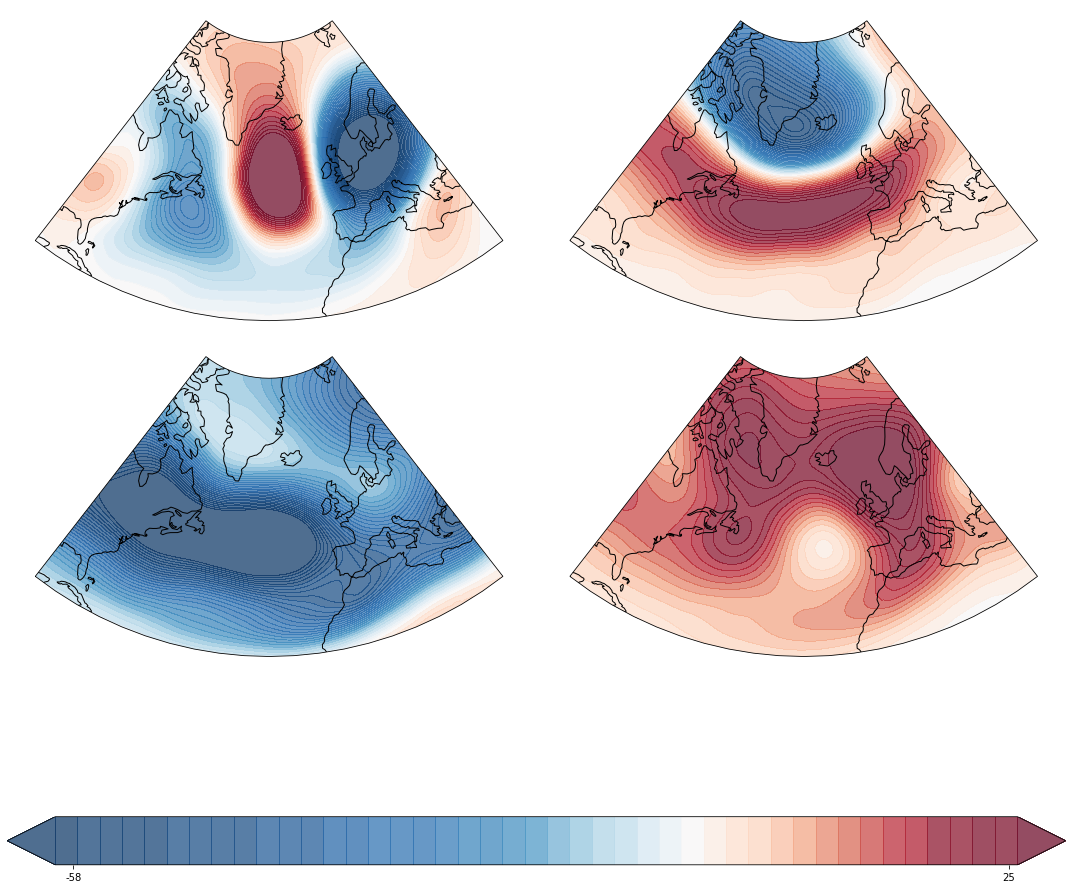

In [14]:
estimator = load_estimator(f'../models/{season}/GEOP_vae/kmeans_model_ch.pkl')
outputs = extract_regimes(reduced_anomaly, method='kmeans', nb_regimes = None, estimator = estimator)
labels, inertias, _ = outputs
#labels_text = {0: 'Zonal', 1: 'AL', 2: 'NAO-', 3: 'SB'}
#labels = list(map(lambda x: labels_text[x], labels))
plot_regimes(pivot_anomaly, labels)

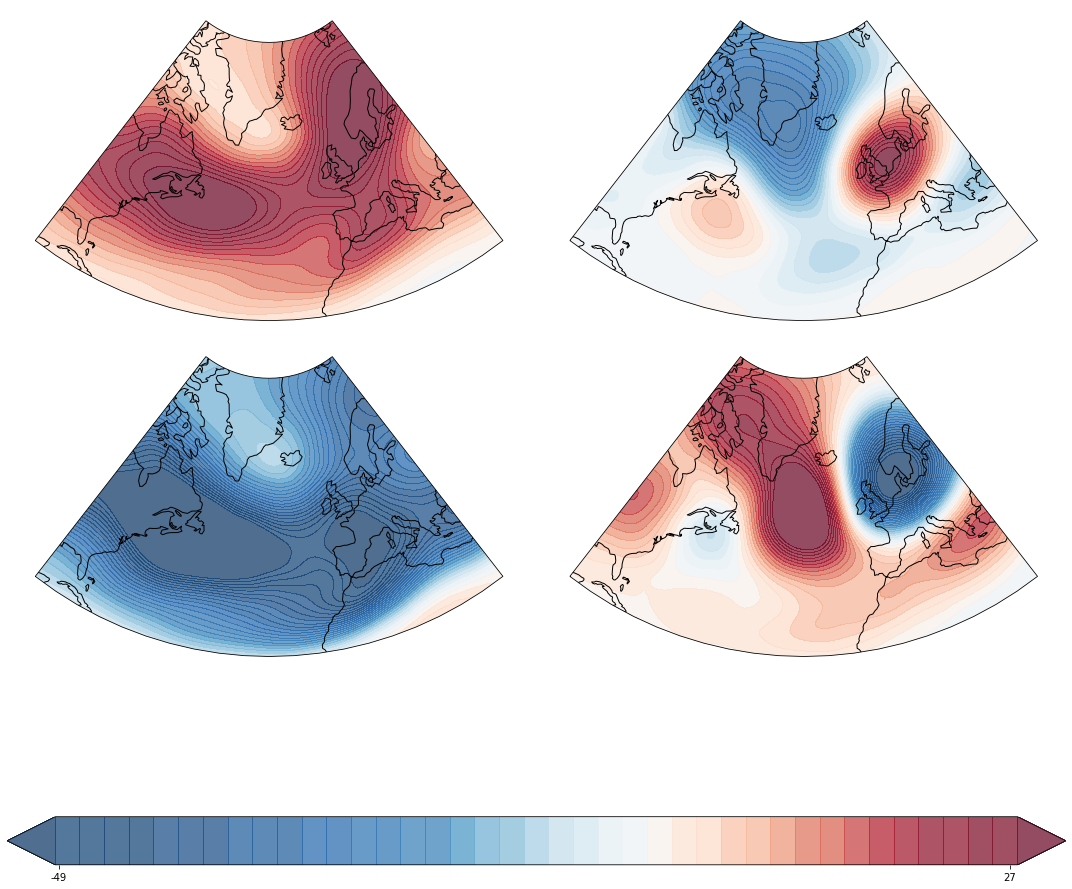

In [15]:
estimator = load_estimator(f'../models/{season}/GEOP_vae/gmm_model_ch.pkl')
probas, elbo, means, covariances, _ = extract_regimes(reduced_anomaly, method='gmm', nb_regimes = None, estimator = estimator)
labels = np.argmax(probas, axis=1)
#labels_text = {0: 'Zonal', 1: 'SB', 2: 'NAO-', 3: 'AL'}
#labels = list(map(lambda x: labels_text[x], labels))
plot_regimes(pivot_anomaly, labels)

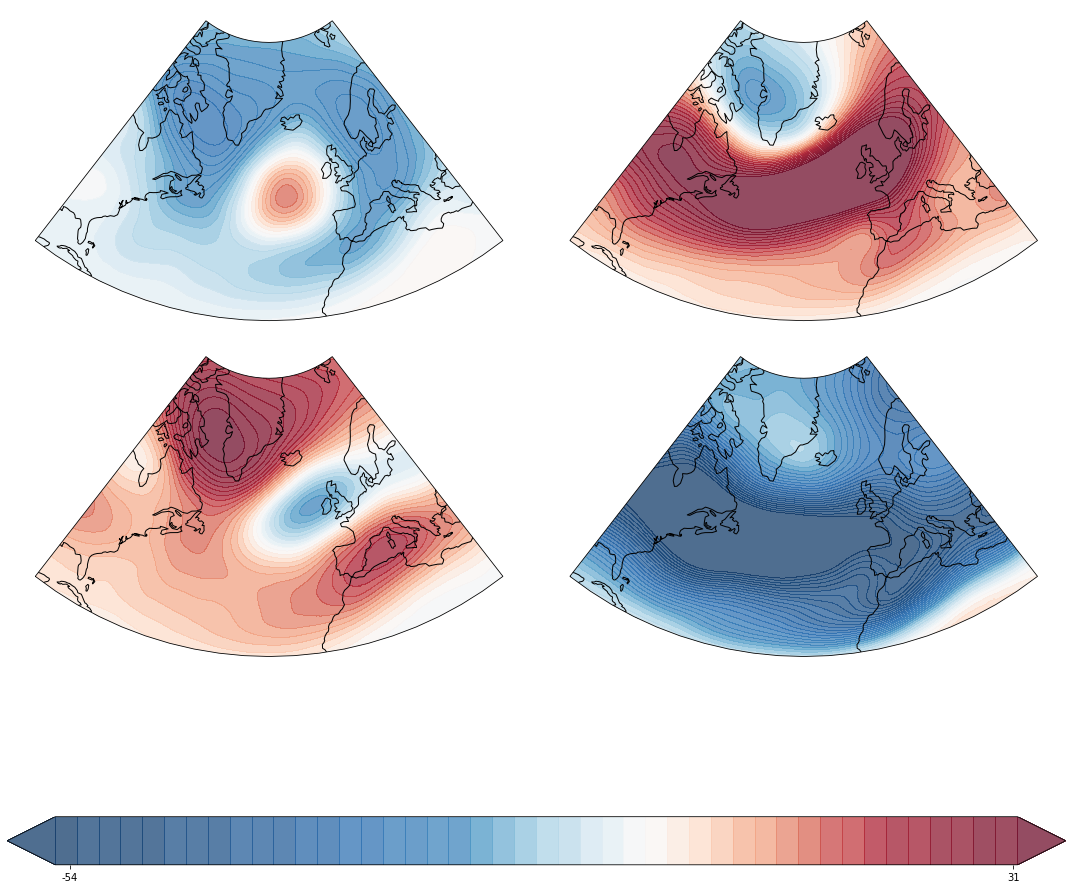

In [16]:
estimator = load_estimator(f'../models/{season}/GEOP_vae/bayesian_gmm_model_bic.pkl')
probas, elbo, means, covariances, _ = extract_regimes(reduced_anomaly, method='bayesian_gmm', nb_regimes = None, estimator = estimator)
labels = np.argmax(probas, axis=1)
#labels_text = {0: 'Zonal', 1: 'SB', 2: 'NAO-', 3: 'AL'}
#labels = list(map(lambda x: labels_text[x], labels))
plot_regimes(pivot_anomaly, labels)

### Geopotential VAE

In [ ]:
get_statistics(f'../models/{season}/GEOP_pca5', train_X, test_X)

In [ ]:
estimator = load_estimator(f'../models/{season}/GEOP_pca5/kmeans_model_ch.pkl')
outputs = extract_regimes(reduced_anomaly, method='kmeans', nb_regimes = None, estimator = estimator)
labels, inertias, _ = outputs
#labels_text = {0: 'Zonal', 1: 'AL', 2: 'NAO-', 3: 'SB'}
#labels = list(map(lambda x: labels_text[x], labels))
plot_regimes(pivot_anomaly, labels)

In [ ]:
estimator = load_estimator(f'../models/{season}/GEOP_pca5/gmm_model_ch.pkl')
probas, elbo, means, covariances, _ = extract_regimes(reduced_anomaly, method='gmm', nb_regimes = None, estimator = estimator)
labels = np.argmax(probas, axis=1)
#labels_text = {0: 'Zonal', 1: 'SB', 2: 'NAO-', 3: 'AL'}
#labels = list(map(lambda x: labels_text[x], labels))
plot_regimes(pivot_anomaly, labels)

In [ ]:
estimator = load_estimator(f'../models/{season}/GEOP_pca5/bayesian_gmm_model_bic.pkl')
probas, elbo, means, covariances, _ = extract_regimes(reduced_anomaly, method='bayesian_gmm', nb_regimes = None, estimator = estimator)
labels = np.argmax(probas, axis=1)
#labels_text = {0: 'Zonal', 1: 'SB', 2: 'NAO-', 3: 'AL'}
#labels = list(map(lambda x: labels_text[x], labels))
plot_regimes(pivot_anomaly, labels)

# SLP

In [5]:
import sys
sys.path.append('../src/')
from modeling.utils.data import *
from modeling.utils.plotting import *
from modeling.utils.config import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
dt = build_data(normal_mode = 'flat')
dt = weighted_anomaly(dt)

Reading anomaly from file
	func:'read_nc' took: 0.0459 sec
	func:'build_data' took: 0.0590 sec
	func:'weighted_anomaly' took: 619.4269 sec


In [7]:
pivot_anomaly = flat_table(dt)

	func:'flat_table' took: 0.9086 sec


In [8]:
reduced_anomaly = reduce_dim(pivot_anomaly, method = 'PCA', exp_variance = .9, season = 'WINTER', save_est = 'pca_winter.pkl')
#reduced_anomaly = reduce_dim(dt, method = 'VAE', season = 'SUMMER', model = "sigma_vae_statedict_5_SLP")

Number of days: 3956, Density of the grid: 23 cells
	func:'reduce_dim' took: 97.8967 sec


In [5]:
train_X, test_X, pivot_train, pivot_test = train_test_split(reduced_anomaly, pivot_anomaly, test_size = 0.2, random_state = 42)

In [47]:
for model in ['kmeans','bayesian_gmm','gmm']:
    for scoring in ["score", "ch", "bic", "silhouette"]:
        estimator = cross_val(reduced_anomaly.values, method = model, scoring = scoring, season = "SUMMER", folder = 'SLP_vae')

	Combination 1 score: -16708.579
	Combination 2 score: -16902.554
	Combination 3 score: -17187.439
	Combination 4 score: -16919.623


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check fo

	Combination 5 score: -16998.359
	Combination 6 score: -17063.797
	Combination 7 score: -17007.417


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



	Combination 8 score: -16908.110
	Combination 9 score: -16694.563
	Combination 10 score: -16846.794
	Combination 11 score: -16460.399
	Combination 12 score: -16526.478
	Combination 13 score: -16656.926
	Combination 14 score: -16550.895
	Combination 15 score: -16848.769
	Combination 16 score: -16948.159
	Combination 17 score: -17043.688
	Combination 18 score: -16806.169
	Combination 19 score: -17221.651
	Combination 20 score: -16871.731
	Combination 21 score: -17118.604
	Combination 22 score: -16807.586
	Combination 23 score: -16784.432


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or che

	Combination 24 score: -17268.573
	Combination 25 score: -16844.111
	Combination 26 score: nan
	Combination 27 score: -16502.550
	Combination 28 score: -16845.301
	Combination 29 score: -16707.401
	Combination 30 score: -16939.452
	Combination 31 score: -16875.697
	Combination 32 score: -16521.596


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check fo

	Combination 33 score: -16744.801
	Combination 34 score: -16800.378


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check fo

	Combination 35 score: -16875.096
	Combination 36 score: -17007.397


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



	Combination 37 score: -16907.641
	Combination 38 score: -16851.809


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check fo

	Combination 39 score: -17306.766


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



	Combination 40 score: -16972.737
	Combination 41 score: -16784.407
	Combination 42 score: -16781.168
	Combination 43 score: -17036.629
	Combination 44 score: nan
	Combination 45 score: -16915.071
	Combination 46 score: -16853.952
	Combination 47 score: -16744.690
	Combination 48 score: -16792.416
	Combination 49 score: -16916.691
	Combination 50 score: -16788.963


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



	Combination 51 score: -17209.987


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or che

	Combination 52 score: -17115.571
	Combination 53 score: -17257.929
	Combination 54 score: -17114.788


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or che

	Combination 55 score: -17198.476
	Combination 56 score: -17435.680
	Combination 57 score: -16828.491
	Combination 58 score: -16919.028
	Combination 59 score: -16558.820
	Combination 60 score: -16481.632
	Combination 61 score: -16794.745
	Combination 62 score: -16836.874
	Combination 63 score: -16820.293
	Combination 64 score: -16543.582
	Combination 65 score: -16951.530
	Combination 66 score: -17116.929


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check fo

	Combination 67 score: -16994.207
	Combination 68 score: -16927.129
	Combination 69 score: -17369.350


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



	Combination 70 score: -17013.700


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



	Combination 71 score: -16933.773


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



	Combination 72 score: -16957.825
	Combination 73 score: -17099.365
	Combination 74 score: -16634.194
	Combination 75 score: nan
	Combination 76 score: nan
	Combination 77 score: -16871.940
	Combination 78 score: -16776.849
	Combination 79 score: -16818.371
	Combination 80 score: -16584.878


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or che

	Combination 81 score: -17699.642
	Combination 82 score: -17141.858


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or che

	Combination 83 score: -16756.136
	Combination 84 score: -17157.289
	Combination 85 score: -17402.210
	Combination 86 score: nan


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



	Combination 87 score: -17450.350
	Combination 88 score: -16946.865
	Combination 89 score: nan
	Combination 90 score: -16901.299
	Combination 91 score: nan
	Combination 92 score: nan
	Combination 93 score: nan
	Combination 94 score: -16866.489
	Combination 95 score: nan
	Combination 96 score: -16500.497
	Combination 97 score: -17593.123
	Combination 98 score: -17035.051


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



	Combination 99 score: -17348.808


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



	Combination 100 score: nan
	Combination 101 score: -16998.968
	Combination 102 score: -17026.823


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check fo

	Combination 103 score: -16987.850


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



	Combination 104 score: -17508.042
	Combination 105 score: nan
	Combination 106 score: nan
	Combination 107 score: -16610.634
	Combination 108 score: nan
	Combination 109 score: -16792.205
	Combination 110 score: nan
	Combination 111 score: nan
	Combination 112 score: -16908.844
	Combination 113 score: nan
	Combination 114 score: nan


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



	Combination 115 score: nan
	Combination 116 score: -17236.941
	Combination 117 score: -17308.043
	Combination 118 score: -17992.649


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



	Combination 119 score: -17226.857


c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



	Combination 120 score: -17370.724
	Combination 121 score: nan
	Combination 122 score: nan
	Combination 123 score: nan
	Combination 124 score: nan
	Combination 125 score: nan
	Combination 126 score: nan
	Combination 127 score: nan
	Combination 128 score: -17024.846
Validation process ended with score -16460.398758265066
Best parameters: {'covariance_prior': None, 'covariance_type': 'full', 'degrees_of_freedom_prior': None, 'init_params': 'kmeans', 'max_iter': 3000, 'mean_precision_prior': None, 'mean_prior': None, 'n_components': 4, 'n_init': 5, 'random_state': 42, 'reg_covar': 1e-06, 'tol': 1e-07, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weight_concentration_prior': None, 'weight_concentration_prior_type': 'dirichlet_process'}
	func:'cross_val' took: 8171.8019 sec


### SLP PCA

In [7]:
get_statistics(f'../models/{season}/SLP_pca', train_X, test_X)

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



	func:'get_statistics' took: 37.7930 sec


Number of Clusters            BIC  \
bayesian_gmm_model_bic.pkl                     4 -128814.859295   
bayesian_gmm_model_score.pkl                   4 -128885.115341   
gmm_model_bic.pkl                              4 -128839.350612   
gmm_model_ch.pkl                               4 -128777.936129   
gmm_model_score.pkl                            6 -128825.415534   
gmm_model_silhouette.pkl                       4 -128773.997178   
kmeans_model_bic.pkl                           7 -127639.680262   
kmeans_model_ch.pkl                            4 -127724.464422   
kmeans_model_score.pkl                         7 -127625.254135   
kmeans_model_silhouette.pkl                    4 -127718.704853   

                              Silhouette Score  Calinski Harabsz Index  \
bayesian_gmm_model_bic.pkl           -0.019916               35.636911   
bayesian_gmm_model_score.pkl          0.034883               49.480384   
gmm_model_bic.pkl                     0.030314               40.885931   
gmm_model_ch.pkl                      0.029977               42.653662   
gmm_model_score.pkl                   0.030755               41.267896   
gmm_model_silhouette.pkl              0.030007               42.862751   
kmeans_model_bic.pkl                  0.064409               56.376334   
kmeans_model_ch.pkl                   0.078600               81.156412   
kmeans_model_score.pkl                0.065054               56.638002   
kmeans_model_silhouette.pkl           0.079129               81.399043   

                                   Inertia  
bayesian_gmm_model_bic.pkl    1.298422e+09  
bayesian_gmm_model_score.pkl  1.310414e+09  
gmm_model_bic.pkl             1.276430e+09  
gmm_model_ch.pkl              1.269038e+09  
gmm_model_score.pkl           1.275050e+09  
gmm_model_silhouette.pkl      1.267849e+09  
kmeans_model_bic.pkl          1.033616e+09  
kmeans_model_ch.pkl           1.125437e+09  
kmeans_model_score.pkl        1.031969e+09  
kmeans_model_silhouette.pkl   1.124697e+09

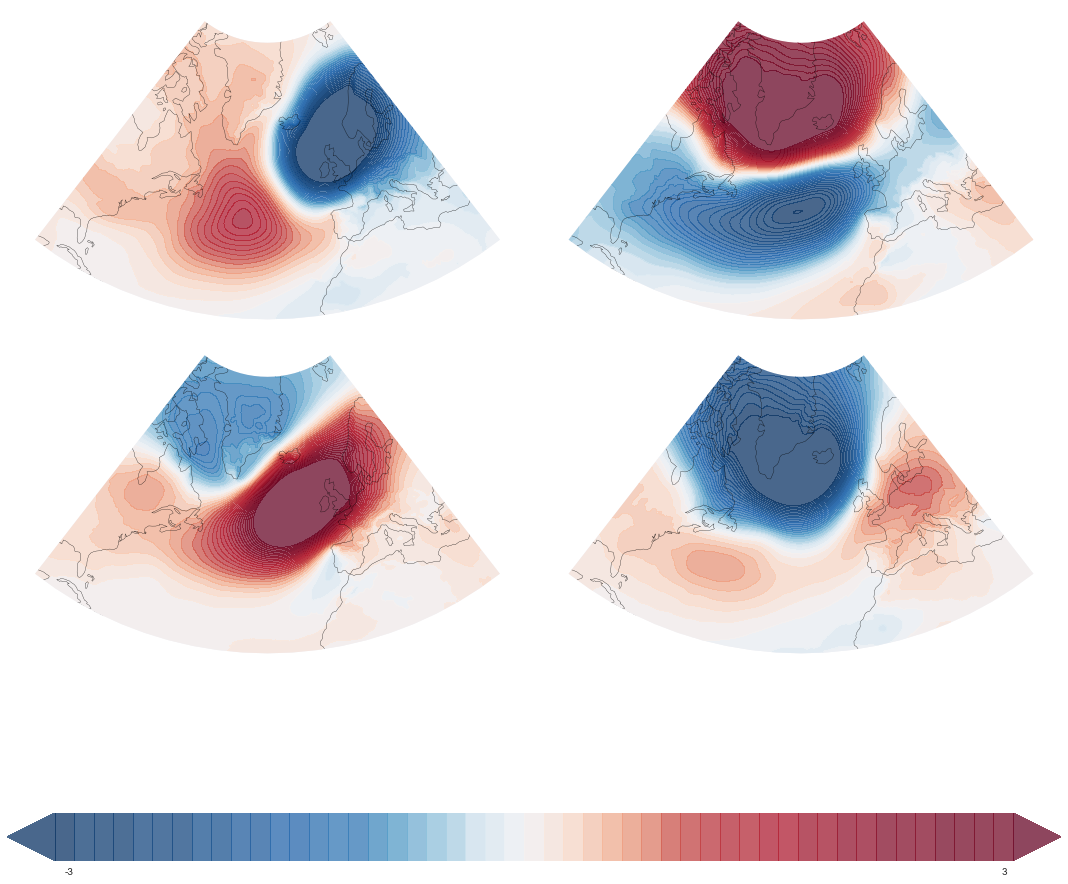

In [87]:
estimator = load_estimator(f'../models/{season}/SLP_pca/kmeans_model_silhouette.pkl')
outputs = extract_regimes(reduced_anomaly, method='kmeans', nb_regimes = None, estimator = estimator)
labels, inertias, _ = outputs
labels_text = {0: 'Zonal', 1: 'AL', 2: 'NAO-', 3: 'SB'}
labels = list(map(lambda x: labels_text[x], labels))
plot_regimes(pivot_anomaly, labels)

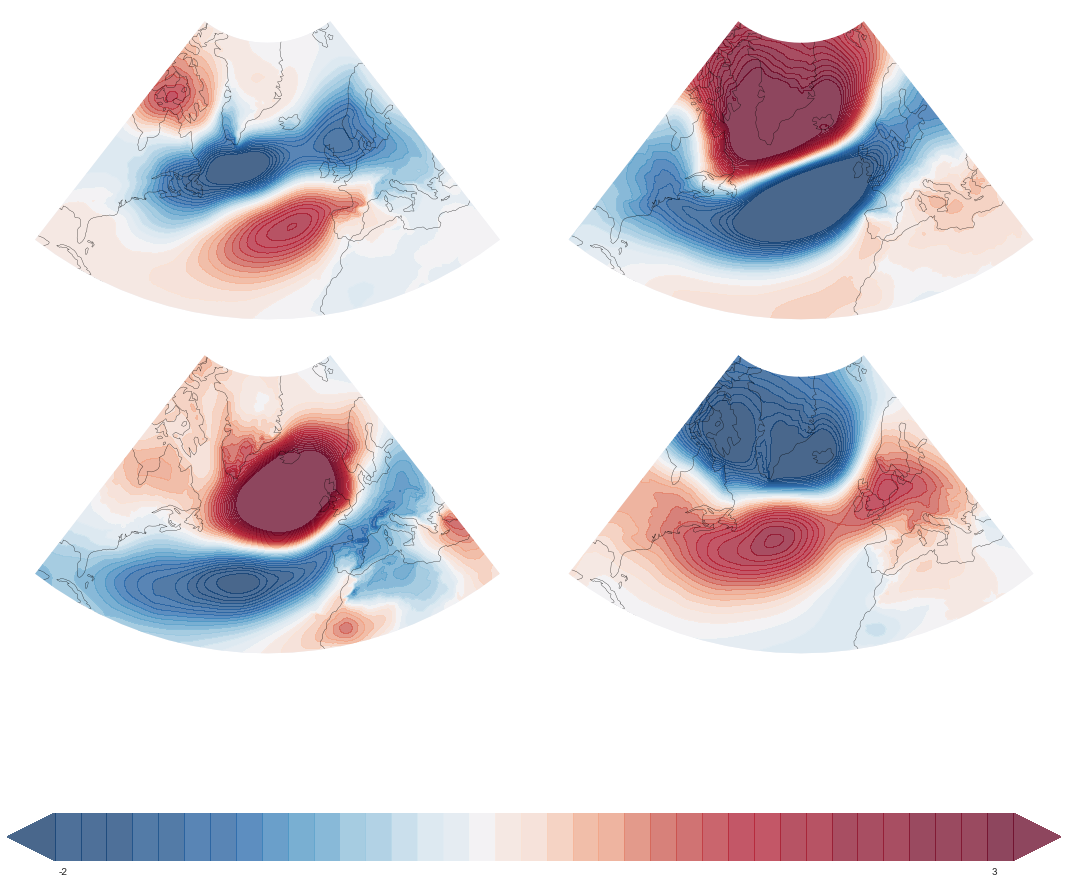

In [89]:
estimator = load_estimator(f'../models/{season}/SLP_pca/gmm_model_silhouette.pkl')
probas, elbo, means, covariances, _ = extract_regimes(reduced_anomaly, method='gmm', nb_regimes = None, estimator = estimator)
labels = np.argmax(probas, axis=1)
labels_text = {0: 'Zonal', 1: 'SB', 2: 'NAO-', 3: 'AL'}
labels = list(map(lambda x: labels_text[x], labels))
plot_regimes(pivot_anomaly, labels)

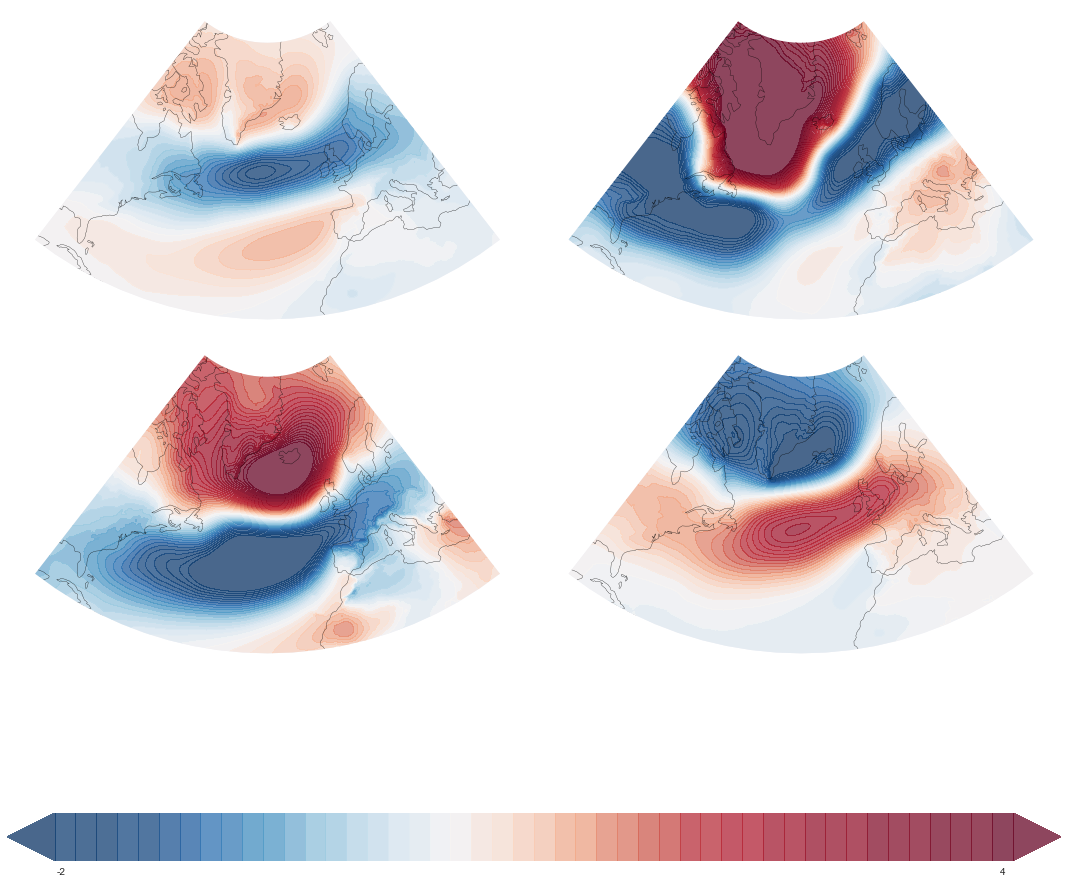

In [94]:
estimator = load_estimator(f'../models/{season}/SLP_pca/bayesian_gmm_model_score.pkl')
probas, elbo, means, covariances, _ = extract_regimes(reduced_anomaly, method='bayesian_gmm', nb_regimes = None, estimator = estimator)
labels = np.argmax(probas, axis=1)
labels_text = {0: 'Zonal', 1: 'NAO-', 2: 'AL', 3: 'SB'}
labels = list(map(lambda x: labels_text[x], labels))
plot_regimes(pivot_anomaly, labels)

### SLP VAE

In [48]:
get_statistics(f'../models/{season}/SLP_vae', train_X, test_X)

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



	func:'get_statistics' took: 46.3578 sec


Number of Clusters           BIC  \
bayesian_gmm_model_bic.pkl                          4 -16891.514541   
bayesian_gmm_model_ch.pkl                           6 -17008.924062   
bayesian_gmm_model_score.pkl                        7 -17172.625813   
bayesian_gmm_model_silhouette.pkl                   5 -16966.894337   
gmm_model_bic.pkl                                   4 -16895.618895   
gmm_model_ch.pkl                                    4 -16892.034299   
gmm_model_score.pkl                                 5 -16897.015351   
gmm_model_silhouette.pkl                            6 -16899.566044   
kmeans_model_bic.pkl                                5 -16289.664205   
kmeans_model_ch.pkl                                 4 -16318.317985   
kmeans_model_score.pkl                              7 -16315.241485   
kmeans_model_silhouette.pkl                         4 -16317.713306   

                                   Silhouette Score  Calinski Harabsz Index  \
bayesian_gmm_model_bic.pkl                 0.069322              120.222651   
bayesian_gmm_model_ch.pkl                  0.053096              106.569845   
bayesian_gmm_model_score.pkl               0.025807               86.536519   
bayesian_gmm_model_silhouette.pkl          0.066337              111.258997   
gmm_model_bic.pkl                          0.068269              119.621644   
gmm_model_ch.pkl                           0.071013              120.148635   
gmm_model_score.pkl                        0.067971              119.385764   
gmm_model_silhouette.pkl                   0.083763              118.193637   
kmeans_model_bic.pkl                       0.235899              224.039582   
kmeans_model_ch.pkl                        0.259698              235.300461   
kmeans_model_score.pkl                     0.202348              187.473141   
kmeans_model_silhouette.pkl                0.259297              235.256218   

                                         Inertia  
bayesian_gmm_model_bic.pkl         661151.593592  
bayesian_gmm_model_ch.pkl          577037.875252  
bayesian_gmm_model_score.pkl       585944.182416  
bayesian_gmm_model_silhouette.pkl  615553.257475  
gmm_model_bic.pkl                  662129.819606  
gmm_model_ch.pkl                   660589.992483  
gmm_model_score.pkl                662403.548794  
gmm_model_silhouette.pkl           661708.532945  
kmeans_model_bic.pkl               452597.127879  
kmeans_model_ch.pkl                507268.646904  
kmeans_model_score.pkl             396018.644771  
kmeans_model_silhouette.pkl        507170.349168

['SB', 'SB', 'SB']


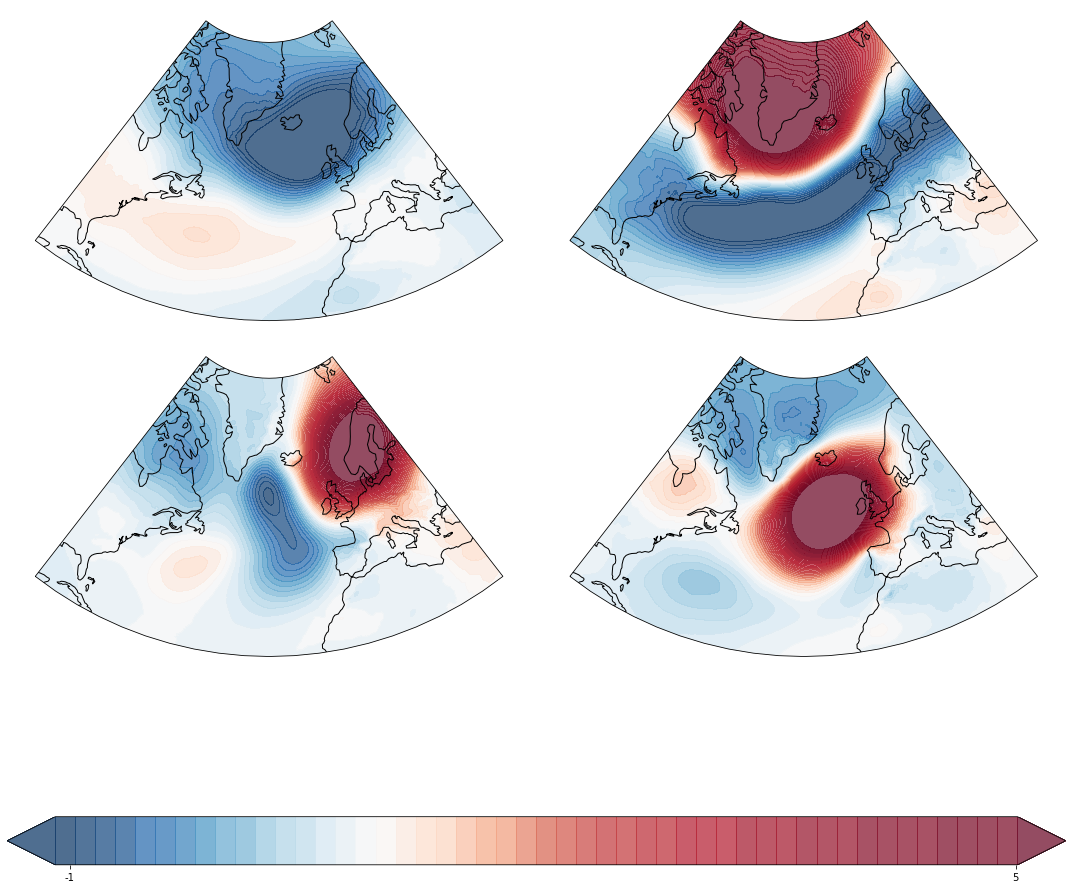

In [24]:
estimator = load_estimator(f'../models/{season}/SLP_vae/kmeans_model_ch.pkl')
outputs = extract_regimes(reduced_anomaly, method='kmeans', nb_regimes = None, estimator = estimator)
labels, inertias, _ = outputs
labels_text = {0: 'SB', 1: 'AL', 2: 'NAO-', 3: 'Zonal'}
labels = list(map(lambda x: labels_text[x], labels))
plot_regimes(pivot_anomaly, labels)

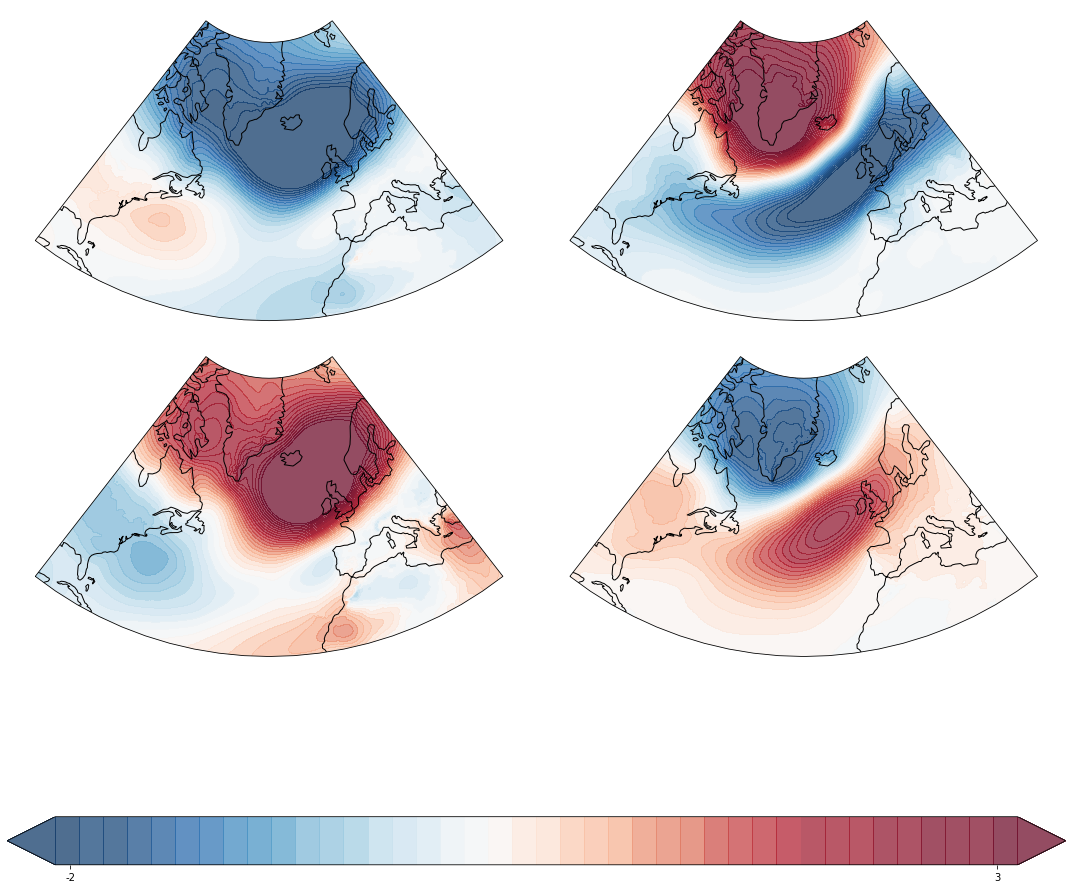

In [26]:
estimator = load_estimator(f'../models/{season}/SLP_vae/gmm_model_ch.pkl')
probas, elbo, means, covariances, _ = extract_regimes(reduced_anomaly, method='gmm', nb_regimes = 5, estimator = estimator)
labels = np.argmax(probas, axis=1)
labels_text = {0: 'SB', 1: 'AL', 2: 'Zonal', 3: 'NAO-'}
labels = list(map(lambda x: labels_text[x], labels))
plot_regimes(pivot_anomaly, labels)

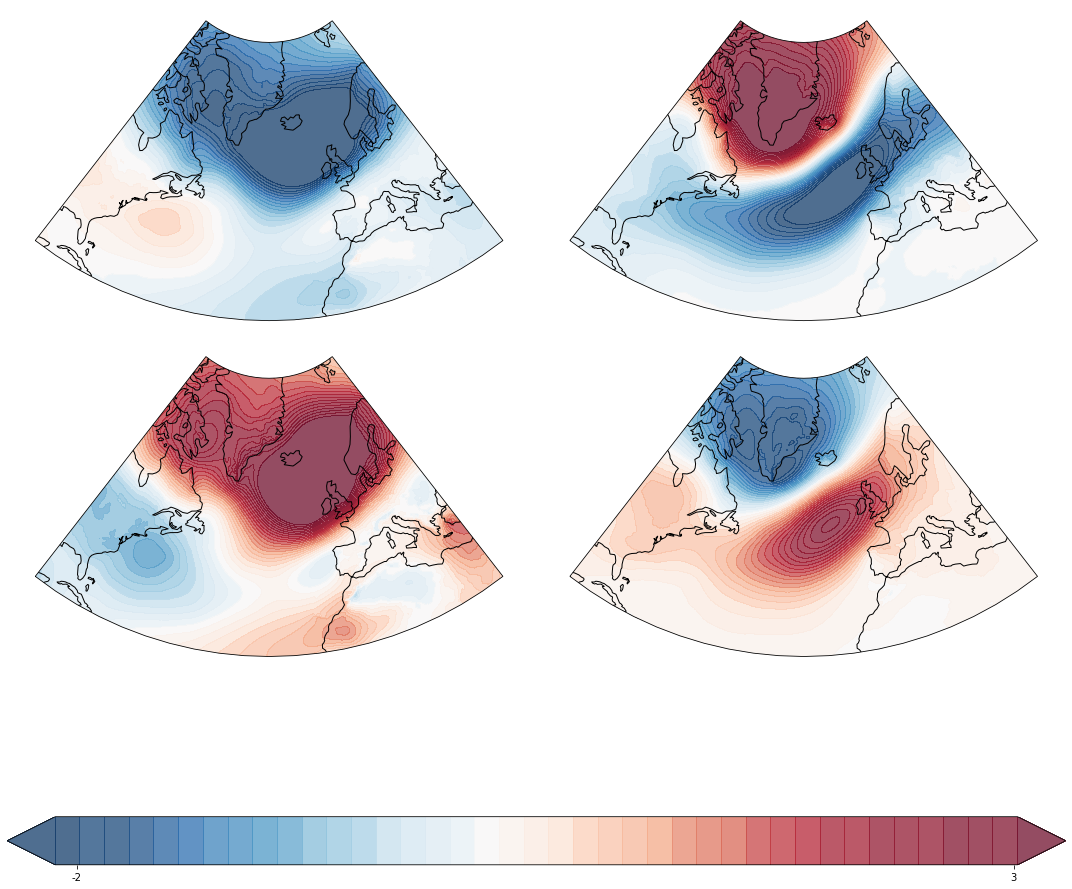

In [68]:
estimator = load_estimator(f'../models/{season}/SLP_vae/bayesian_gmm_model_bic.pkl')
probas, elbo, means, covariances, _ = extract_regimes(reduced_anomaly, method='bayesian_gmm', nb_regimes = None, estimator = estimator)
labels = np.argmax(probas, axis=1)
labels_text = {0: 'Zonal', 1: 'AL', 2: 'SB', 3: 'NAO-'}
labels = list(map(lambda x: labels_text[x], labels))
plot_regimes(pivot_anomaly, labels)

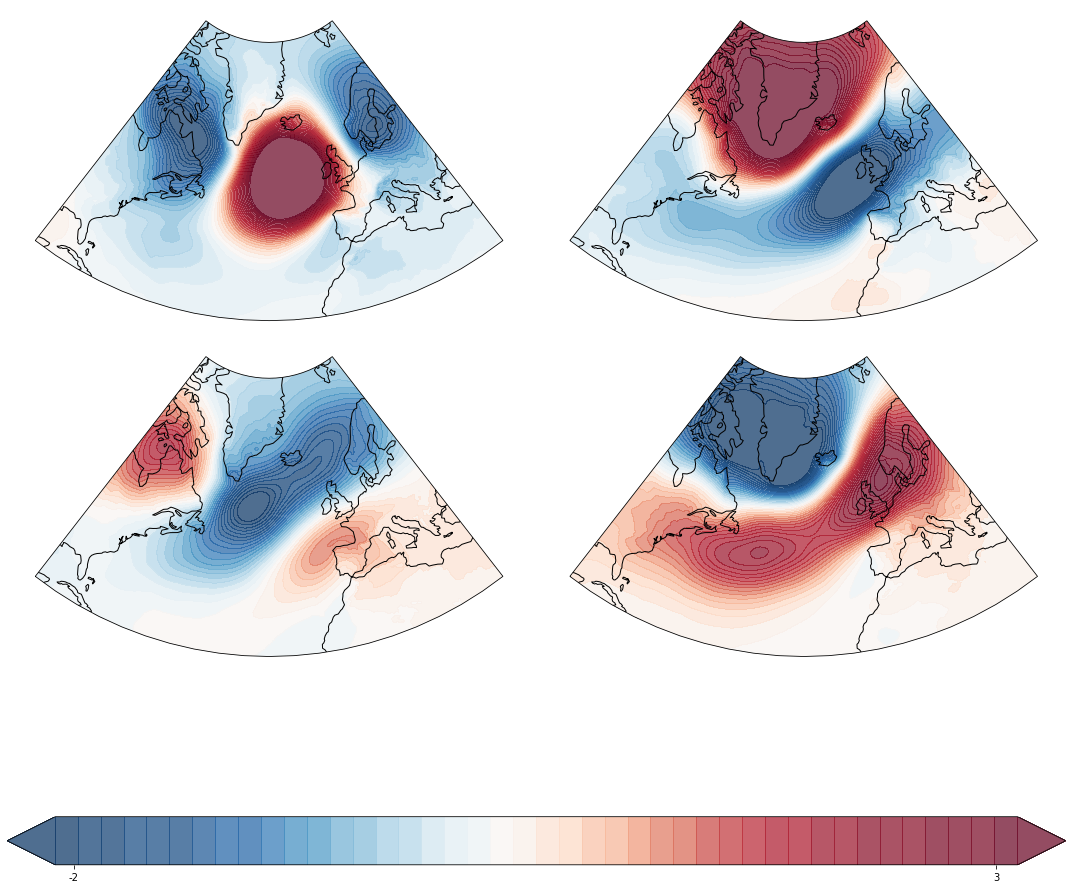

In [10]:
estimator = load_estimator(f'../models/{season}/SLP_pca5/gmm_model_ch.pkl')
probas, elbo, means, covariances, _ = extract_regimes(reduced_anomaly, method='gmm', nb_regimes = 5, estimator = estimator)
labels = np.argmax(probas, axis=1)
plot_regimes(pivot_anomaly, labels)

c:\python36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



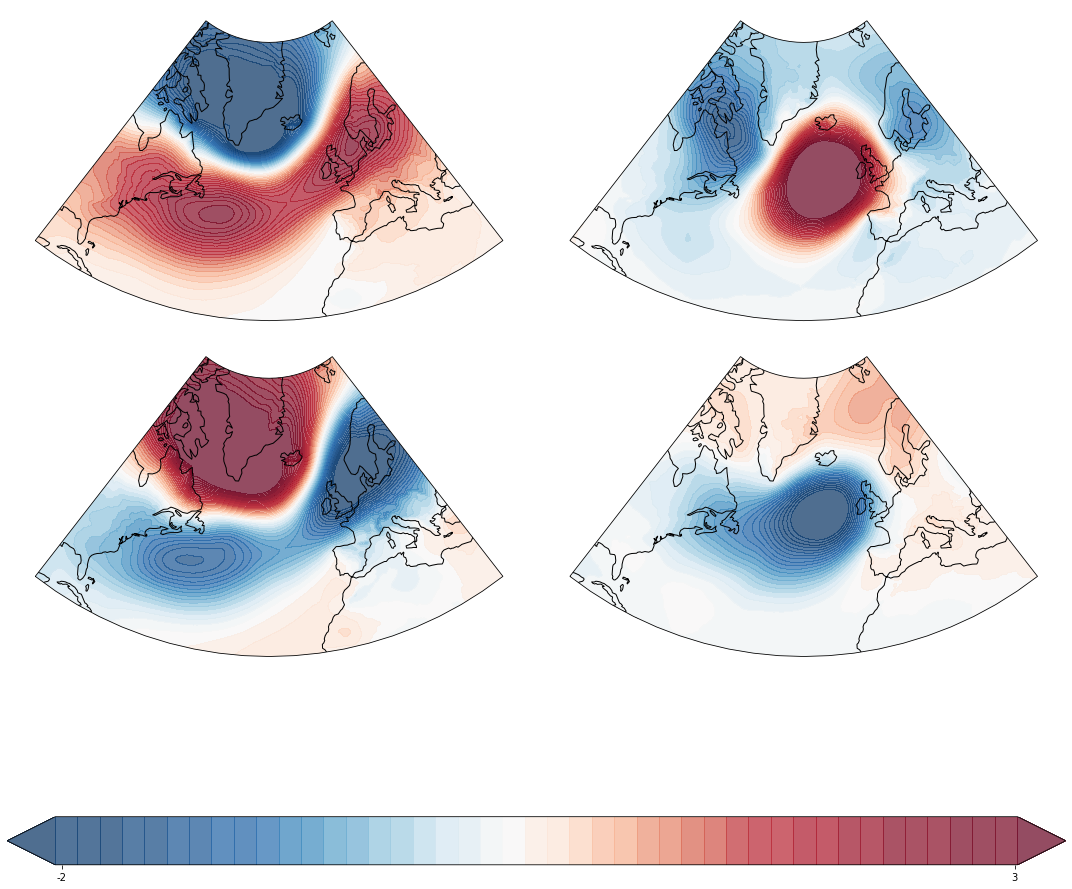

In [11]:
estimator = load_estimator(f'../models/{season}/SLP_pca5/bayesian_gmm_model_ch.pkl')
probas, elbo, means, covariances, _ = extract_regimes(reduced_anomaly, method='bayesian_gmm', nb_regimes = 5, estimator = estimator)
labels = np.argmax(probas, axis=1)
plot_regimes(pivot_anomaly, labels)

###

# Winter

In [1]:
import sys
sys.path.append('../src/')
from modeling.utils.data import *
from modeling.utils.plotting import *
from modeling.utils.config import *
%load_ext autoreload
%autoreload 2

cpu


In [2]:
season, physical_qty, months

('WINTER', 'Geopotential-500hPa', 'DecJanFeb')

In [2]:
dt = build_data(normal_mode = 'flat')
dt = weighted_anomaly(dt)

Reading anomaly from file
	func:'read_nc' took: 0.1510 sec
	func:'build_data' took: 0.1590 sec
	func:'weighted_anomaly' took: 367.9040 sec


In [3]:
dt

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 481, time: 3850)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 -89.25 ... 29.5 29.75 30.0
  * latitude   (latitude) float32 80.0 79.75 79.5 79.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2021-02-28
Data variables:
    z          (time, latitude, longitude) float32 75.83 75.16 ... -32.99 -33.2

In [4]:
pivot_anomaly = flat_table(dt)

	func:'flat_table' took: 0.8866 sec


In [5]:
#reduced_anomaly = reduce_dim(pivot_anomaly, method = 'PCA', exp_variance = .9, season = 'WINTER', save_est = 'pca_winter.pkl')
reduced_anomaly = reduce_dim(dt, method = 'VAE', season = 'WINTER', model = "sigma_vae_statedict_5")

Processing batch 16Number of days: 3850, Density of the grid: 5 cells
	func:'reduce_dim' took: 598.2091 sec


In [6]:
reduced_anomaly

<xarray.DataArray (time: 3850, dim_1: 5)>
array([[ -43.571667,  152.97366 ,  108.701065,   67.05573 , -159.58253 ],
       [  -1.754297,  155.7877  ,  126.56183 ,  -16.44232 ,  -99.45399 ],
       [  19.251846,  198.44243 ,  238.03226 , -116.9827  ,    4.632445],
       ...,
       [-212.28282 ,   98.88185 ,  -31.83996 ,  139.48471 ,  -49.88867 ],
       [-177.01028 ,  121.01555 ,  150.80463 ,  194.39484 ,  -52.167336],
       [-163.3421  ,  140.18837 ,  236.12404 ,  216.90256 ,  -59.32457 ]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2021-02-28
  * dim_1    (dim_1) int32 1 2 3 4 5

In [9]:
train_X, test_X, pivot_train, pivot_test = train_test_split(reduced_anomaly, pivot_anomaly, test_size = 0.2, random_state = 42)

In [ ]:
preds = pd.read_csv('../predictions/predictions_winter.csv', index_col = 0, header = [0,1])
preds

Method     K-Means               GMM                      Bayesian-GMM         \
Regime        NAO+ SB AR NAO-   NAO+     SB     AR   NAO-         NAO+     SB   
01/01/1979       0  0  0    1  0.000  0.000  0.013  0.987        0.000  0.000   
02/01/1979       0  0  1    0  0.002  0.000  0.138  0.859        0.002  0.000   
03/01/1979       0  0  1    0  0.000  0.000  0.960  0.040        0.000  0.000   
04/01/1979       0  0  1    0  0.000  0.003  0.996  0.000        0.166  0.000   
05/01/1979       0  0  1    0  0.020  0.039  0.941  0.000        0.911  0.003   
...            ... .. ..  ...    ...    ...    ...    ...          ...    ...   
24/02/2021       0  1  0    0  0.048  0.798  0.000  0.154        0.009  0.932   
25/02/2021       0  1  0    0  0.183  0.728  0.001  0.088        0.050  0.891   
26/02/2021       0  1  0    0  0.000  0.961  0.001  0.037        0.000  0.960   
27/02/2021       0  1  0    0  0.000  0.987  0.000  0.013        0.000  0.987   
28/02/2021       0  1  0    0  0.000  0.983  0.000  0.017        0.000  0.981   

Method                    
Regime         AR   NAO-  
01/01/1979  0.336  0.664  
02/01/1979  0.534  0.464  
03/01/1979  1.000  0.000  
04/01/1979  0.834  0.000  
05/01/1979  0.086  0.000  
...           ...    ...  
24/02/2021  0.051  0.008  
25/02/2021  0.033  0.026  
26/02/2021  0.038  0.003  
27/02/2021  0.013  0.000  
28/02/2021  0.019  0.000  

[3850 rows x 12 columns]

In [72]:
reduced_anomaly2 = pd.DataFrame(PCA(3).fit_transform(reduced_anomaly), columns = ['PC1', 'PC2', 'PC3'])
reduced_anomaly2.index = preds.index
reduced_anomaly2

PC1         PC2         PC3
01/01/1979  -97.350555 -103.556198   51.019726
02/01/1979  -80.284111  -15.756011    4.979469
03/01/1979 -118.629189  160.362076    4.600521
04/01/1979  -97.807808  342.631592  -54.799477
05/01/1979  -76.901611  243.759552 -153.617523
...                ...         ...         ...
24/02/2021  -84.210388 -259.636414   16.301517
25/02/2021  -48.725853 -164.539124  -33.562695
26/02/2021  -24.252378 -108.667229    3.779245
27/02/2021  -80.847588  -49.952080  167.302231
28/02/2021 -117.785416  -25.176098  240.113754

[3850 rows x 3 columns]

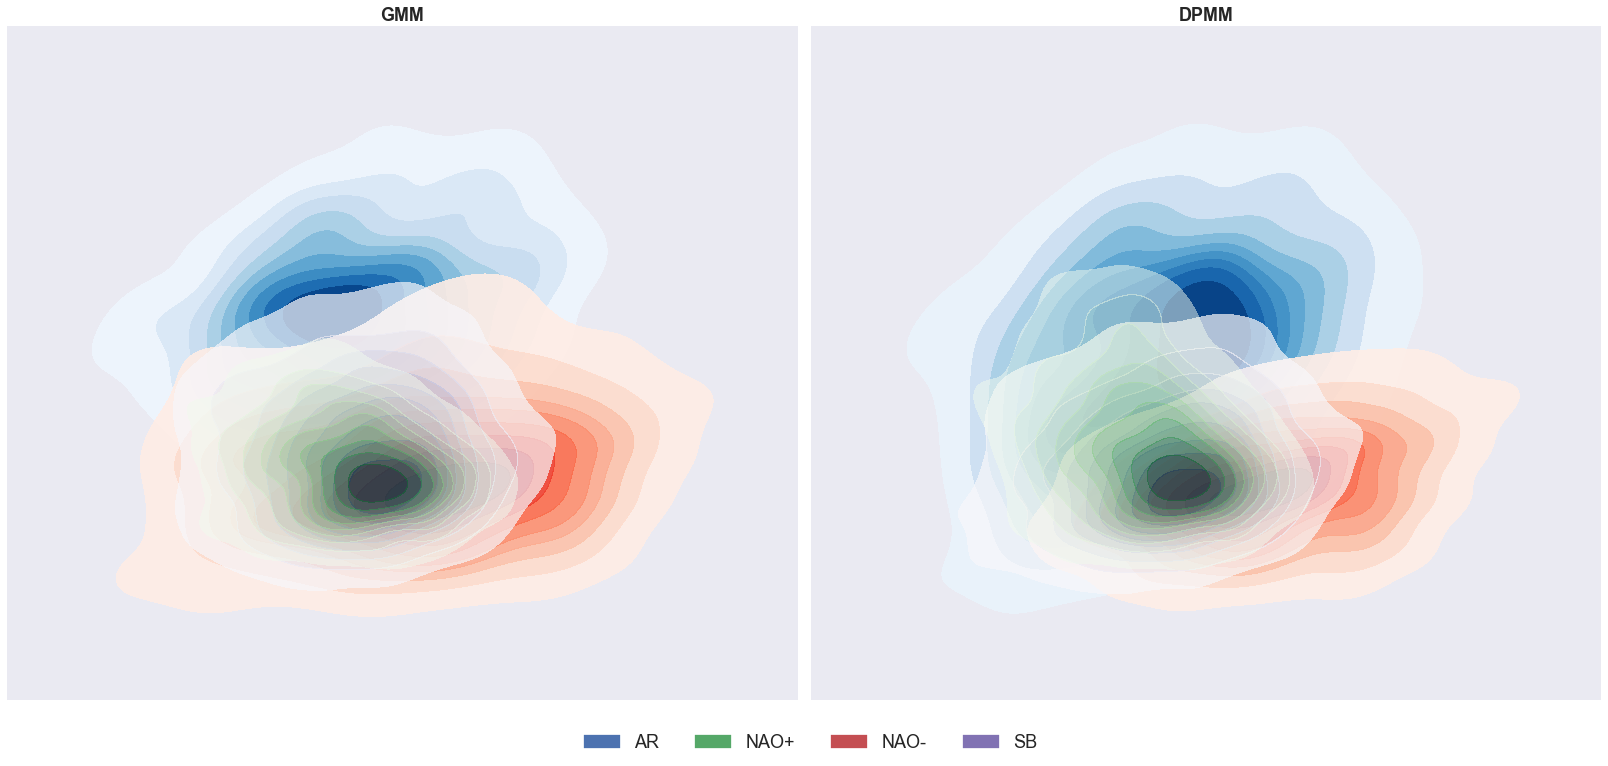

In [162]:
#from mpl_toolkits.mplot3d import axes3d
sns.set_context("notebook", rc={"axes.labelsize":16,"axes.titlesize":20, "legend.fontsize":16})
plt.style.use('seaborn')
fig, axs = plt.subplots(1,2, figsize = (22.5,10))
ax = axs[0]
ax.grid(None)
sns.kdeplot(data = reduced_anomaly2, x = 'PC1', y = 'PC2', cmap = 'Blues', shade = True, weights = preds.loc[:, ('GMM','AR')], ax = ax, alpha = 1)
sns.kdeplot(data = reduced_anomaly2, x = 'PC1', y = 'PC2', cmap = 'Reds', shade = True, weights = preds.loc[:, ('GMM','NAO-')], ax = ax, alpha = .9)
sns.kdeplot(data = reduced_anomaly2, x = 'PC1', y = 'PC2', cmap = 'Purples', shade = True, weights = preds.loc[:, ('GMM','SB')], ax = ax, alpha = .7)
sns.kdeplot(data = reduced_anomaly2, x = 'PC1', y = 'PC2', cmap = 'Greens', shade = True, weights = preds.loc[:, ('GMM','NAO+')], ax = ax, alpha = .5)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("GMM", fontdict = {'weight':'bold', 'size': 18})
ax = axs[1]
ax.grid(None)
sns.kdeplot(data = reduced_anomaly2, x = 'PC1', y = 'PC2', cmap = 'Blues', shade = True, weights = preds.loc[:, ('Bayesian-GMM','AR')], ax = ax, alpha = 1)
sns.kdeplot(data = reduced_anomaly2, x = 'PC1', y = 'PC2', cmap = 'Reds', shade = True, weights = preds.loc[:, ('Bayesian-GMM','NAO-')], ax = ax, alpha = .9)
sns.kdeplot(data = reduced_anomaly2, x = 'PC1', y = 'PC2', cmap = 'Purples', shade = True, weights = preds.loc[:, ('Bayesian-GMM','SB')], ax = ax, alpha = .7)
sns.kdeplot(data = reduced_anomaly2, x = 'PC1', y = 'PC2', cmap = 'Greens', shade = True, weights = preds.loc[:, ('Bayesian-GMM','NAO+')], ax = ax, alpha = .5)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("DPMM", fontdict = {'weight':'bold', 'size': 18})
fig.tight_layout()
palette = sns.color_palette("deep")
plt.legend(handles=
           [mpl.patches.Patch(color=palette[0], label='AR'), mpl.patches.Patch(color=palette[2], label='NAO+'), mpl.patches.Patch(color=palette[3], label='NAO-'), mpl.patches.Patch(color=palette[4], label='SB')],
              bbox_to_anchor = (0, -.1), loc = 'lower center', ncol = 4, fontsize = 18)
plt.show()

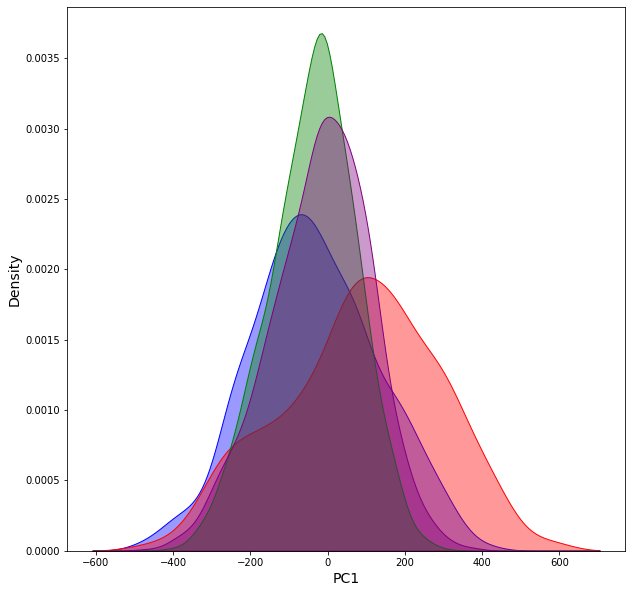

In [59]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
sns.kdeplot(reduced_anomaly2['PC1'], color = 'b', shade = True, weights = preds.loc[:, ('GMM','AR')], ax = ax, alpha = .4)
sns.kdeplot(reduced_anomaly2['PC1'], color = 'r', shade = True, weights = preds.loc[:, ('GMM','NAO-')], ax = ax, alpha = .4)
sns.kdeplot(reduced_anomaly2['PC1'], color = 'g', shade = True, weights = preds.loc[:, ('GMM','NAO+')], ax = ax, alpha = .4)
sns.kdeplot(reduced_anomaly2['PC1'], color = 'purple', shade = True, weights = preds.loc[:, ('GMM','SB')], ax = ax, alpha = .4)
plt.show()

In [95]:
 class GaussianKde(scipy.stats.gaussian_kde):
        """
        Drop-in replacement for gaussian_kde that adds the class attribute EPSILON
        to the covmat eigenvalues, to prevent exceptions due to numerical error.
        """
    
        EPSILON = 1e-8  # adjust this at will
    
        def _compute_covariance(self):
            """Computes the covariance matrix for each Gaussian kernel using
            covariance_factor().
            """
            self.factor = self.covariance_factor()
            # Cache covariance and inverse covariance of the data
            if not hasattr(self, '_data_inv_cov'):
                self._data_covariance = np.atleast_2d(np.cov(self.dataset, rowvar=1,
                                                             bias=False,
                                                             aweights=self.weights))
                # we're going the easy way here
                self._data_covariance += self.EPSILON * np.eye(
                    len(self._data_covariance))
                self._data_inv_cov = np.linalg.inv(self._data_covariance)
    
            self.covariance = self._data_covariance * self.factor**2
            self.inv_cov = self._data_inv_cov / self.factor**2
            L = np.linalg.cholesky(self.covariance * 2 * np.pi)
            self._norm_factor = 2*np.log(np.diag(L)).sum()  # needed for scipy 1.5.2
            self.log_det = 2*np.log(np.diag(L)).sum()  # changed var name on 1.6.2

In [126]:
data = []
for regime in ['AR', 'NAO+', 'NAO-', 'SB']:
    X = np.array(reduced_anomaly2['PC1'])
    Y = np.array(reduced_anomaly2['PC2'])
    data.append(np.vstack([X * preds.loc[:,('GMM', regime)], Y * preds.loc[:,('GMM', regime)]]))

In [127]:
dist = [scipy.stats.gaussian_kde(dd) for dd in data]

In [ ]:
a = 3

(10000,)
(10000,)
(10000,)
(10000,)


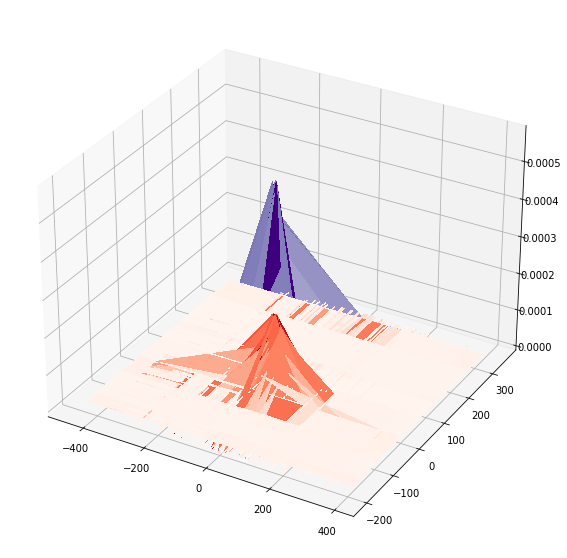

In [142]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize = (10, 10))
dd = np.vstack([reduced_anomaly2['PC1'], reduced_anomaly2['PC2']])
x,y = dd
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()
indexes = np.random.choice(range(len(x)), 100)
X, Y = np.meshgrid(x[indexes], y[indexes])
pos = np.vstack([X.ravel(), Y.ravel()])
for regime, cmap, density in zip(['AR', 'NAO+', 'NAO-', 'SB'], ['Blues', 'Greens', 'Reds', 'Purples'], dist):
    Z = density.evaluate(pos)
    print(Z.shape)
    ax.plot_surface(X,Y,Z.reshape(X.shape), cmap = cmap, linewidth = 0, antialiased = False)
plt.show()